<a href="https://colab.research.google.com/github/abay-qkt/plotly-tips-collection/blob/main/plotly_tips_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotly Tips Collection



このノートブックでは、Plotlyを使ったデータの可視化をより簡単に、  
よりリッチにするための便利な関数やオプションを紹介します。    
お役に立てば幸いです！

- 基本的に章ごとに独立して実行できるようにしてあります
- 目次の内容を見て、気になるものから見ても大丈夫です！


# はじめに

plotly.expressは、少ないコードでインタラクティブなグラフを描画できる可視化ライブラリです。

- プロットはHTMLで出力されるため、ズームやパン、ホバーといったインタラクティブな操作ができます
- pandasのDataFrameを入力すれば、x軸y軸はもちろん、色分けやサブプロットまで、列名を指定するだけで描画されます

In [1]:
import plotly.express as px
df = px.data.experiment() # サンプルデータのロード
df.head(3)

experiment_1  experiment_2  experiment_3  gender      group
0     96.876065     93.417942     73.033193    male    control
1     87.301336    129.603395     66.056554  female    control
2     97.691312    106.187916    103.422709    male  treatment

In [2]:
px.scatter(df,
           x="experiment_1",  # x軸
           y="experiment_2",  # y軸
           color="group",     # 色分けしたい列
           facet_col="gender",  # プロットを分けたい列
           hover_data=["experiment_3"]  # ホバー時に表示させたい列
)

## Plotlyでできること
Plotlyで出来ることが一覧表示されている公式ドキュメントページを紹介します📊  
https://plotly.com/python/  
各機能が図とともに掲載されているので、参照しやすくなっています。  
多様なオプションやインタラクティブなグラフ作成の方法が詳しく載っているのでおすすめです！

## plotly.expressで描画できるプロット
plotly .expressでどんなグラフが作成できるかは、公式ドキュメントのこのページに網羅的に書かれていてわかりやすいです。
https://plotly.com/python/plotly-express/

短いコードで、様々なグラフを同じような使い勝手で描けます。

## plotly.expressとgraph_objectsについて

Plotlyは、plotly .express (px)を使うのがおすすめです💡

元はplotly .graph_objects (go)からできていますが、  
自分でgoから作るより、pxで作った方が少ないコードで見やすいプロットが作れます📊

特にpandasと相性が良く、ラベルなども自動で表示してくれます

In [3]:
import plotly.express as px
df = px.data.iris()

In [4]:
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1

In [5]:
# goを使う場合
import plotly.graph_objects as go
go.Figure(data=go.Scatter(x=df["sepal_width"], y=df["sepal_length"], mode='markers'))

In [6]:
# pxを使う場合
import plotly.express as px
px.scatter(df,x='sepal_width',y='sepal_length')

# グラフの操作方法と設定

## グラフの操作方法

plotlyの初見だと気づきにくい操作方法💡  
・軸のドラッグによるパン  
・軸端ドラッグによるズーム  
・グラフをダブルクリックで、ズーム・パンのリセット  
・凡例をダブルクリックで一つの凡例だけ表示。再度ダブルクリックで全表示に戻す

https://x.com/abe_tetsu/status/1780537425431023890

In [7]:
import plotly.express as px
df = px.data.iris() # サンプルデータ

In [8]:
px.scatter(df,x="sepal_length",y="sepal_width",color="species")

## dragmode, scrollZoom：パン・スクロールズーム設定

plotlyでドラッグのデフォルト挙動は範囲ズームですが、  
update_layoutのdragmodeオプションで、パン操作に設定できます（プロット生成後も右上のメニューから切り替え可能です）

それと、showのconfigオプションで、スクロールでズームできるような設定もできます💡

https://plotly.com/python/configuration-options/

In [9]:
import plotly.express as px
df = px.data.iris() # サンプルデータ

In [10]:
fig = px.scatter(df,x="sepal_length",y="sepal_width",color="species")
fig.update_layout(dragmode='pan') # ドラッグでパン操作(右上メニューでも切替可)
fig.show(config={"scrollZoom":True}) # マウススクロールでズーム可能にする

# オプション紹介

## facet：指定した列ごとにサブプロットを自動生成

facetオプションを使えば、たったこれだけのコードで、条件ごとのグラフを作成できます💡

facet_row, facet_colオプションに、グラフの書き分けに使いたい列を指定することで、   
その列の情報ごとにグラフを一気に作成してくれます。

In [11]:
import plotly.express as px
df = px.data.experiment() # サンプルデータのロード

In [12]:
px.scatter(df,x="experiment_1",y="experiment_2",color="experiment_3",
           facet_row="gender",facet_col="group")

## for_each_annotation：facet時のラベルを簡潔にする

facetと一緒によく使う設定💡  
・for_each_annotion()：subplotのタイトルをすっきりさせたいとき使う  
・update_yaxes(mathces=None)：軸の連動を切りたいとき使う

https://plotly.com/python/facet-plots/

In [13]:
import plotly.express as px
df = px.data.tips() # サンプルデータ

In [14]:
fig = px.scatter(df, x="total_bill", y="tip", facet_row="sex")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])) # 「カラム名=値」の「値」だけ表示
fig.update_yaxes(matches=None) # y軸の同期を切りたい場合
fig.show()

## hover_data：ホバー表示する列の指定

マウスオーバーしたときに表示するカラムを指定できます。  
x,y軸以外のカラム情報も同時に確認出来て便利です💡

In [15]:
import plotly.express as px
df = px.data.iris() # サンプルデータ

In [16]:
px.scatter(df,x="sepal_length",y="sepal_width",color="species",
           hover_data=["petal_length","petal_width"])

## labels：列の表示名を変える

plotly .expressで、入力するpandas .DataFrameの列名とグラフ表示上の名前を変えたいときは、labelsオプションを使うのが便利です。  
{"列名":"表示名"}の辞書で指定します。


In [17]:
import plotly.express as px
df = px.data.iris() # サンプルデータ
df.head(3)

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1

In [18]:
px.scatter(df,x="petal_width",y="petal_length",color="species",
           labels={"petal_width":"花びらの幅[cm]","petal_length":"花びらの長さ[cm]","species":"花の種類"})

## category_order：列の表示順を変える

plotly .expressでは、category_orderオプションでカテゴリ列の表示順を指定することができます。

In [19]:
import seaborn as sns
df = sns.load_dataset("titanic").groupby(["sex","alive"],as_index=False).size()
df  # サンプルデータ

sex alive  size
0  female    no    81
1  female   yes   233
2    male    no   468
3    male   yes   109

In [20]:
import plotly.express as px
px.bar(df,x="sex",y="size",facet_col="alive",
       width=600,height=300,
       category_orders={ # カテゴリ列の表示順を辞書で指定
           "sex":["male","female"],
           "alive":["yes","no"]})

## marginal_x,_y：散布図にヒストグラム等を組み合わせる

各種関数のmarginal_x,yオプションで、横と縦にヒストグラムや箱ひげ図などを併せて描画できます。  
分布の違いがより分かりやすくなると思います💡


https://plotly.com/python/marginal-plots/

In [21]:
import plotly.express as px
df = px.data.iris() # サンプルデータ

In [22]:
px.scatter(df,x="sepal_width",y="sepal_length",color="species",
           marginal_x='histogram',marginal_y='histogram')

## scaleanchor：縦軸横軸のスケールと統一

Figureオブジェクトで  
update_yaxes(scaleanchor='x')  
を使うと、縦軸と横軸のスケールを統一できます📊  
同じ単位のデータを正確に比較したい場合に便利です！

In [23]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df,x='sepal_width',y='sepal_length')

fig.update_yaxes(scaleanchor='x')

## trendlineオプション：回帰直線の描画

plotly.express.scatterのtrendlineオプションを使うと、散布図と回帰直線の可視化が手軽に行えます。  
裏でstatsmodelを動かしていて、詳細な結果も確認することができます。

公式ドキュメント  
https://plotly.com/python/linear-fits/

In [24]:
import plotly.express as px
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", facet_col="smoker", color="sex", trendline="ols")
fig.show()

In [25]:
results = px.get_trendline_results(fig)
display(results)

sex smoker                                     px_fit_results
0  Female     No  <statsmodels.regression.linear_model.Regressio...
1  Female    Yes  <statsmodels.regression.linear_model.Regressio...
2    Male     No  <statsmodels.regression.linear_model.Regressio...
3    Male    Yes  <statsmodels.regression.linear_model.Regressio...

In [26]:
summary_male_smoker = results.query("sex == 'Male' and smoker == 'Yes'").px_fit_results.iloc[0].summary()
print(summary_male_smoker)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     17.56
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           9.61e-05
Time:                        00:12:33   Log-Likelihood:                -101.03
No. Observations:                  60   AIC:                             206.1
Df Residuals:                      58   BIC:                             210.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4253      0.424      3.361      0.0

# 時系列データ

## plotly 多変量時系列サブプロット

make_suplotsを使わなくてもサブプロットが描けます

In [27]:
import plotly.express as px
df = px.data.stocks()

In [28]:
# subplotsを使ったやり方
# https://plotly.com/python/subplots/
import plotly.express as px
df = px.data.stocks() # サンプルデータ

from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=len(df.columns)-1, cols=1,
                    shared_xaxes=True)
for i,col in enumerate(df.columns[1:]):
    fig.add_trace(go.Scatter(x=df["date"], y=df[col],name=col),
                  row=i+1, col=1)
fig.update_layout(height=1000)

In [29]:
import plotly.express as px
df = px.data.stocks() # サンプルデータ

df = df.set_index('date') # 日時情報をindexにする
df.columns.name='company' # columnsに名前を付ける
fig = px.line(df,facet_row='company',height=1000)
fig.update_yaxes(matches=None) # y軸の同期を切りたい場合

In [30]:
# pxを使ったやり方(データを縦持ちにするやり方)
df_s = df.reset_index().melt(id_vars="date",var_name='company',value_name='stock')# 縦持ち化
fig = px.line(df_s, x="date",y="stock",facet_row="company",color="company",height=1000)
fig.update_yaxes(matches=None)# y軸の同期を切りたい場合

In [31]:
# 一つのプロットだけでやる場合
fig = px.line(df.reset_index(),x='date',y=df.columns[1:])
# px.line(df.set_index("date")) # こちらも可
fig.update_layout(hovermode='x')

## hovermode：ホバーの出現条件を設定


plotlyはデフォルトだと、点にマウスオーバーしないとホバー情報が表示されませんが、  
fig.update_layout(hovermode="x")などと設定すると、x軸があっていればホバー情報を表示できるようにできます💡  
時系列データを可視化するときに便利です

公式のサンプルはこちらです👇  
https://plotly.com/python/hover-text-and-formatting/

In [32]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")

fig = px.line(df, x="year", y="lifeExp", color="country", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")

fig.show()

In [33]:
import plotly.express as px

df = px.data.gapminder().query("continent=='Oceania'")

fig = px.line(df, x="year", y="lifeExp", color="country", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified")

fig.show()

Hover on Subplots
New in 5.21

Use hoversubplots to define how hover effects expand to additional subplots. With hoversubplots=axis, hover effects are included on stacked subplots using the same axis when hovermode is set to x, x unified, y, or y unified.



Plotly ver5.21から、サブプロットで同時にホバーができるようになったみたいです。
公式のサンプルにgraph_objectsを使った例が書いてあります（Hover on Subplotsの章）👇  
https://plotly.com/python/hover-text-and-formatting/

plotly.expressの方でもやってみました！

In [34]:
import plotly.express as px
import pandas as pd

df =px.data.stocks(indexed=True)
fig = px.line(df, facet_row="company")
fig.update_traces(xaxis='x')
fig.update_layout(hoversubplots="axis",hovermode="x unified")
fig.show()

# GUI生成

## range_slider：x軸のズームやパンができるスライダーを表示

Plotlyのrangesliderオプションで、グラフの下にスライダーを表示させることができます。  
時系列データの時間方向のズームやパンがやりやすくなります。

公式ドキュメント
https://plotly.com/python/range-slider/


In [35]:
import plotly.express as px
df = px.data.stocks(indexed=True)
df.head(3)  # サンプルデータ

company         GOOG      AAPL      AMZN        FB      NFLX      MSFT
date                                                                  
2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524

In [36]:
fig = px.line(df,markers=True)
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),type="date"))
# fig.update_xaxes(rangeslider={"visible":True},type="date") # これでもできる

## range_selector：x軸の範囲をボタンで切り替え

Plotlyのrangeselectorオプションを使うと、ズーム範囲をボタンで切り替えることができます。  
例えば、表示される範囲を1年分にしたいときに、ドラッグ操作で調整するより手早く設定できて便利です

各オプションに関してはこちらの記事がわかりやすかったです  
https://ai-research-collection.com/plotly-button/

In [37]:
import plotly.express as px
df = px.data.stocks(indexed=True) # サンプルデータ
fig = px.line(df,markers=True)
fig.update_layout(
    xaxis=dict(
        type="date",
        rangeslider=dict(visible=True),
        rangeselector=dict(
                buttons=list([
                    dict(label="1か月",count=1,step="month",stepmode="backward"),
                    dict(label="半年",count=6,step="month",stepmode="backward"),
                    dict(label="1年",count=1,step="year",stepmode="backward"),
                    dict(label='全期間',step="all")
                ])
        )
))

## dropdown：ドロップダウンメニューの作成

plotlyでdropdownを作成することもできます。  
表示非表示を切り替えられるようにしたいときに便利です。


こちらのページに例が載っています  
https://plotly.com/python/dropdowns/


<pre>
Methods
The updatemenu method determines which plotly.js function will be used to modify the chart. There are 4 possible methods:

"restyle": modify data or data attributes
"relayout": modify layout attributes
"update": modify data and layout attributes
"animate": start or pause an animation
</pre>

In [38]:
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
df = px.data.iris()
fig = go.Figure()
fig.add_traces(px.scatter(df[df["species"]=="setosa"],x='sepal_length',y='sepal_width').data)
fig.add_traces(px.scatter(df[df["species"]=="versicolor"],x='sepal_length',y='sepal_width').data)
fig.add_traces(px.scatter(df[df["species"]=="virginica"],x='sepal_length',y='sepal_width').data)
fig.update_layout(updatemenus=[dict(active=0,buttons=[
    dict(label='setosa',method="update",args=[{"visible": [True,False,False]}]),
    dict(label='versicolor',method="update",args=[{"visible": [False,True,False]}]),
    dict(label='virginica',method="update",args=[{"visible": [False,False,True]}])
],x=0.01,xanchor="left",y=1.11,yanchor="top")])

# 便利プロット

## scatter_matrix：すべての列の組み合わせでまとめて散布図作成
px.scatter_matrixを使えば、dimensionsオプションで指定した列名すべての組み合わせの散布図を一気に作成できます💡

In [40]:
import plotly.express as px
df = px.data.iris() # サンプルデータのロード

In [41]:
px.scatter_matrix(
    df,
    dimensions=["sepal_length","sepal_width","petal_length","petal_width"],
    color="species",
    width=800,height=700)

## timeline：ガントチャート作成

plotly.expressでは、timeline関数でガントチャートを描画することができます📊


公式ドキュメント  
https://plotly.com/python/gantt/

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28'),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15'),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30')
])
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task")
fig.update_yaxes(autorange="reversed") # y軸は上から下の順に並べる
fig.show()

## plotly-calplot：カレンダーヒートマップ
Plotlyで、GithubのContributionグラフみたいなカレンダーヒートマップを簡単に作成できるモジュールがあります。  
何らかの活動状況など可視化したいときに便利だと思います📊

リンク  
https://github.com/brunorosilva/plotly-calplot





In [42]:
!pip install plotly-calplot

In [43]:
import pandas as pd
import numpy as np
dummy_start_date = "2019-01-01"
dummy_end_date = "2021-10-03"
# date range from start date to end date and random
# column named value using amount of days as shape
dummy_df = pd.DataFrame({
    "ds": pd.date_range(dummy_start_date, dummy_end_date),
    "value": np.random.randint(low=0, high=30,
size=(pd.to_datetime(dummy_end_date) - pd.to_datetime(dummy_start_date)).days + 1,),
})
dummy_df.head(3)

ds  value
0 2019-01-01     27
1 2019-01-02     26
2 2019-01-03     14

In [44]:
from plotly_calplot import calplot
fig = calplot(dummy_df, x="ds", y="value")
fig.show()

# 地図を使った可視化

## scatter_mapbox：地図上にプロット

plotly .expressのscatter_mapboxで、地図上に散布図を表示しつつ各地点の値の大きさを色で表現できます。  

In [45]:
import pandas as pd
# サンプルデータ
df = pd.DataFrame([
    {"latitude": 35.6895, "longitude": 139.6917, "value": 100, "location": "東京"},
    {"latitude": 35.4478, "longitude": 139.6425, "value": 150, "location": "横浜"},
    {"latitude": 36.3418, "longitude": 140.4468, "value": 200, "location": "水戸"},
    {"latitude": 35.8569, "longitude": 139.6489, "value": 120, "location": "さいたま"},
    {"latitude": 35.6044, "longitude": 140.1233, "value": 90, "location": "千葉"},
])

In [46]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color='value', hover_data=["location"],
                        mapbox_style="carto-positron",
                        zoom=7, height=300, width=600)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(config={"scrollZoom":True}) # マウススクロールでズーム可能にする

GeoPandasも可視化可能

https://plotly.com/python/scattermapbox/

In [47]:
import geopandas as gpd
# サンプルデータの作成
data = {
    'Name': ['Location1', 'Location2', 'Location3'],
    'Latitude': [35.6895, 35.6892, 35.6897],
    'Longitude': [139.6917, 139.6922, 139.6914]
}
df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs='EPSG:4326'
)
gdf.head(3)

Name  Latitude  Longitude                  geometry
0  Location1   35.6895   139.6917  POINT (139.6917 35.6895)
1  Location2   35.6892   139.6922  POINT (139.6922 35.6892)
2  Location3   35.6897   139.6914  POINT (139.6914 35.6897)

In [48]:
import plotly.express as px
px.scatter_mapbox(gdf,
                  lat=gdf.geometry.y,
                  lon=gdf.geometry.x,
                  hover_name="Name",
                  mapbox_style='open-street-map',
                  zoom=15)

## mapbox_style：地図のスタイル

地図の種類は選べて、トークン不要で使えるのはこちらの4種  
・open-street-map  
・white-bg  
・carto-positron  
・carto-darkmatter  
mapbox_styleオプションで指定できます。

関連ページ
- https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html
- https://plotly.com/python/mapbox-layers/
- https://plotly.com/python/scattermapbox/

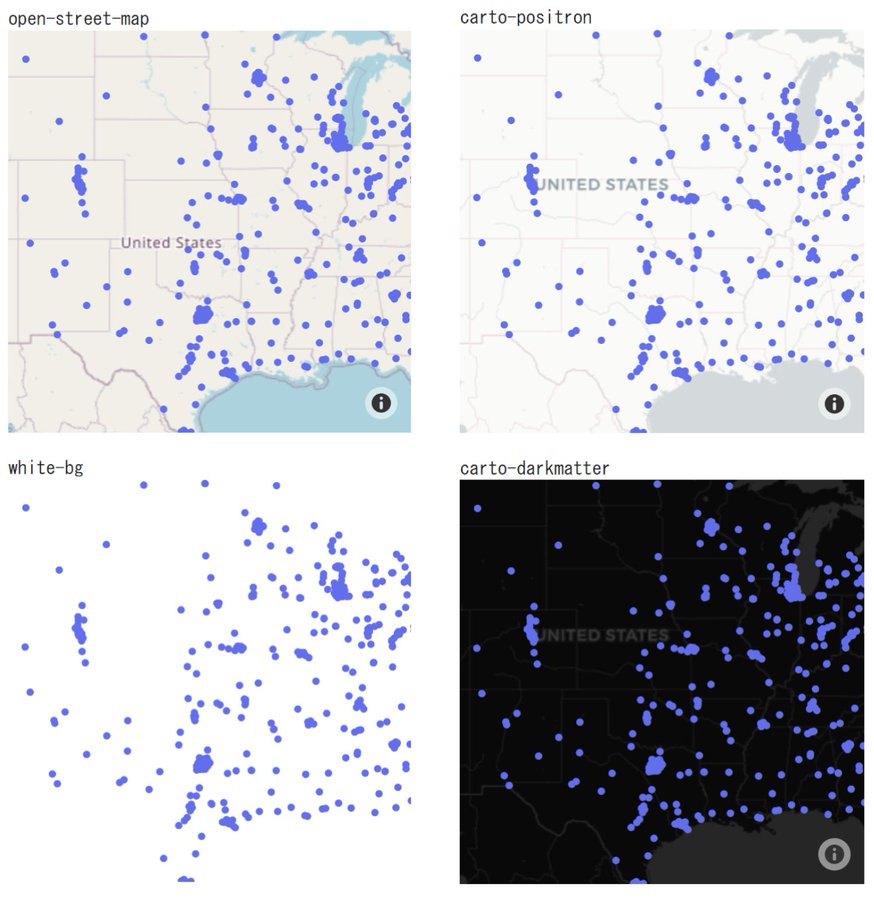

In [49]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

In [50]:
fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_data=["State"],
                        mapbox_style="open-street-map",
                        zoom=3, height=300, width=600)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [51]:
# APIキー不要で利用できるスタイル
mp_style = ['open-street-map', 'white-bg', 'carto-positron', 'carto-darkmatter']

In [52]:
for mp in mp_style[4:]:
  print(mp)
  fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_data=["State"],
                        mapbox_style=mp,
                        zoom=3, height=300, width=300)
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()
  print()

## choropleth_mapbox：都道府県など、塗分け地図の作成

plotly .expressのchoropleth_mapboxで塗分け地図が作成できます。
図は各都道府県の総人口を色で示したものです。

統計センターが都道府県別の諸々の情報を公開していますが、こういったデータの可視化に便利です。

https://www.nstac.go.jp/use/literacy/ssdse/

In [53]:
import pandas as pd
import geopandas as gpd
# 統計センターのデータ（47都道府県の12年分の人口、経済、教育、労働、医療、福祉など、様々な分野の統計データが入っている）
df = pd.read_excel('https://www.nstac.go.jp/sys/files/SSDSE-B-2024.xlsx',header=1).sort_values(["地域コード","年度"])
# 地図情報(都道府県の輪郭の緯度経度のポリゴン情報が入っている)
gdf = gpd.read_file("https://raw.githubusercontent.com/smartnews-smri/japan-topography/main/data/municipality/geojson/s0001/prefectures.json")

In [54]:
import plotly.express as px
fig = px.choropleth_mapbox(df,
                           geojson=gdf,
                           featureidkey='properties.N03_001',
                           locations='都道府県',
                           color='総人口',
                           animation_frame="年度",
                           hover_data=["総人口（男）","総人口（女）"],
                           mapbox_style="carto-positron",
                           zoom=4, center = {"lat": 37.5, "lon": 139},
                           opacity=0.5,
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## deinsity_mapbox：ヒートマップ

plotly .expressでは、density_mapboxで地図上にヒートマップを描画することができます🌍  
集中している地点を把握するのに便利です💡

公式ドキュメント
https://plotly.com/python/mapbox-density-heatmaps/

In [55]:
import pandas as pd
import plotly.express as px
# サンプルデータ
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
df.head(3)

Date  Latitude  Longitude  Magnitude
0  01/02/1965    19.246    145.616        6.0
1  01/04/1965     1.863    127.352        5.8
2  01/05/1965   -20.579   -173.972        6.2

In [56]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Magnitude',
                        radius=10,
                        center=dict(lat=39, lon=135), zoom=4,
                        mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Plotlyをさらにインタラクティブにする

Add Custom Interactivity with Jupyter Widgets：https://plotly.com/python/chart-events/

## FigureWidget：クリックで任意の関数が実行可能なプロット

PlotlyのFigureWidgetを使うと、プロットの内のクリックイベントをトリガーにPython関数を実行することができます。

GIFは公式ドキュメントを元にしたサンプルで、クリックした点を変化させるとともに点の情報を表示させています。

サンプルコード：https://plotly.com/python/click-events/

In [57]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.rand(100)
y = np.random.rand(100)

f = go.FigureWidget([go.Scatter(x=x, y=y, mode='markers')])

scatter = f.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
f.layout.hovermode = 'closest'


# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    print(points)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)

display(f)

FigureWidget({
    'data': [{'marker': {'color': [#a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                                   #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4, #a3a7e4,
                         

In [58]:
from google.colab import output
output.enable_custom_widget_manager() # Colabで外部ウィジェット有効化

In [59]:
import plotly.graph_objects as go
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df,x='sepal_width',y='petal_width',color='species')
fw = go.FigureWidget(fig)

def test_function(trace, points, selector):
  for idx in points.point_inds:
    x = trace["x"][idx]
    y = trace["y"][idx]
    print(f"{x}, {y}")

for i in range(len(fw.data)):
  fw.data[i].on_click(test_function)

display(fw)

FigureWidget({
    'data': [{'hovertemplate': 'species=setosa<br>sepal_width=%{x}<br>petal_width=%{y}<extra></extra>',
              'legendgroup': 'setosa',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'setosa',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'uid': '4fcf4535-6fa4-46a5-9088-e1f607fa2c3d',
              'x': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. , 3. ,
                          4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5,
                          3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3,
                          3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3]),
              'xaxis': 'x',
              'y': array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1,
                          0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2

## FigureWidgetとipywidgetsの組み合わせ

plotly FigureWidgetを使うと、ipywidgetsと組み合わせることで、notebook上でインタラクティブなグラフを作成できます。

サンプルコードはこちらです
https://plotly.com/python/figurewidget-app/

In [60]:
# colabの場合
from google.colab import output
output.enable_custom_widget_manager()

In [61]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])

textbox = widgets.Dropdown(
    description='Airline:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))

def validate():
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['carrier'] == textbox.value,
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])

## Dash：Plotlyを使えるWebアプリ作成ライブラリ

Pythonでデータ分析のWebアプリ作成はstreamlitが人気ですが、Dashもおすすめです。  
DashはPlotlyを使ったダッシュボードの作成のフレームワークで、レイアウトのカスタマイズ性が高いです。  

こちらのページでデモアプリを触ってみることができます。  
- https://dash.gallery/Portal/  
- https://plotly.com/examples/  

デモのコードはこちらで公開されています。  
- https://github.com/plotly/dash-sample-apps


DashはJupyter上でも実行できます。  
https://dash.plotly.com/dash-in-jupyter  
Notebook上でコード編集や動作確認ができて便利です。  

昔はjupyter-dashというパッケージが別途必要でしたが、今は素のdashでもできるよう統合されたみたいです。  

# 見た目を変える

## template：プロットの見た目を変更

plotly. expressには、templateというオプションがあり、seabornのような見た目にしたり、  
プレゼン用に文字大きめな見た目にしたりできます。


https://plotly.com/python/templates/

In [62]:
import plotly.express as px

df = px.data.iris()

In [63]:
px.scatter(df,x='sepal_width',y='sepal_length',color='species',template='seaborn')

In [64]:
px.scatter(df,x='sepal_width',y='sepal_length',color='species',template='presentation')

## plotly.io.templates：デフォルトテンプレート設定

plotly .io.template_defaultで、デフォルトのテンプレートを変更できます。  
常に文字大きめで表示させたい場合は、デフォルトのテンプレートをpresentationに設定しておくと良いと思います。  
テンプレートの自作もできるみたいです。  
https://plotly.com/python/templates/


In [65]:
import plotly.express as px
import plotly.io as pio

In [66]:
# デフォルトのテンプレートを設定
pio.templates.default="presentation"

In [67]:
df = px.data.iris() # サンプルデータ
px.scatter(df,x='sepal_width',y='sepal_length',color='species')

In [68]:
pio.templates # 使用可能なテンプレート

Templates configuration
-----------------------
    Default template: 'presentation'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [69]:
pio.templates.default='plotly'